# Read Data

In [193]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('SUI_USDT_futures_15m_20241231.csv')

# Drop unused columns
df.drop(columns=['coin','unused', 'closetime'], inplace=True)

# Drop unused columns
df.drop(columns=['volume','quotevolume', 'trades', 'taker_buy_volume', 'taker_buy_quote'], inplace=True)

# Display the first few rows of the DataFrame
df

,opentime,openprice,highprice,lowprice,closeprice
0,1683129600000,1.4030,1.4030,1.2652,1.3338
1,1683130500000,1.3339,1.3863,1.3327,1.3716
2,1683131400000,1.3717,1.3957,1.3547,1.3857
3,1683132300000,1.3866,1.3924,1.3652,1.3733
4,1683133200000,1.3731,1.3756,1.3405,1.3574
...,...,...,...,...,...
58323,1735620300000,4.0787,4.0850,4.0616,4.0828
58324,1735621200000,4.0829,4.0953,4.0738,4.0810
58325,1735622100000,4.0811,4.0990,4.0637,4.0982
58326,1735623000000,4.0982,4.1310,4.0900,4.1198


# Explore

In [ ]:
df_setup = df.copy()

# Define bull/bear candle
df_setup['bull'] = (df_setup['closeprice'] > df_setup['openprice']).astype(int)

# Calculate candle body size
df_setup['body_size'] = abs(df_setup['closeprice'] - df_setup['openprice'])

# Calculate tail length
df_setup['high_tail'] = abs(df_setup['highprice'] - df_setup[['openprice', 'closeprice']].max(axis=1))
df_setup['low_tail'] = abs(df_setup['lowprice'] - df_setup[['openprice', 'closeprice']].min(axis=1))

# Calculate tail to body ratio
df_setup['high_tail_ratio'] = df_setup['high_tail'] / df_setup['body_size']
df_setup['low_tail_ratio'] = df_setup['low_tail'] / df_setup['body_size']

# Calculate body + tail
df_setup['body_high_tail_ratio'] = (df_setup['high_tail'] + df_setup['body_size']) / df_setup['openprice'] * 100
df_setup['body_low_tail_ratio'] = (df_setup['low_tail'] + df_setup['body_size']) / df_setup['openprice'] * 100

# Get Next Openprice
df_setup['next_openprice'] = df_setup['openprice'].shift(-1)

# Calculate the max highprice for the next hours
df_setup['next_1h_max_chg'] = (df_setup['closeprice'].shift(-4).rolling(window=4).max() - df_setup['next_openprice']) / df_setup['next_openprice'] *100
df_setup['next_2h_max_chg'] = (df_setup['closeprice'].shift(-8).rolling(window=8).max() - df_setup['next_openprice']) / df_setup['next_openprice'] *100

# Calculate the min lowprice for the next hours
df_setup['next_1h_min_chg'] = (df_setup['closeprice'].shift(-4).rolling(window=4).min() - df_setup['next_openprice']) / df_setup['next_openprice'] *100
df_setup['next_2h_min_chg'] = (df_setup['closeprice'].shift(-8).rolling(window=8).min() - df_setup['next_openprice']) / df_setup['next_openprice'] *100

df_setup.dropna(inplace=True)

df_setup

,opentime,openprice,highprice,lowprice,closeprice,bull,body_size,high_tail,low_tail,high_tail_ratio,low_tail_ratio,body_high_tail_ratio,body_low_tail_ratio,next_openprice,next_1h_max_chg,next_2h_max_chg,next_1h_min_chg,next_2h_min_chg
7,1683135900000,1.3611,1.3619,1.3100,1.3331,0,0.0280,0.0008,0.0231,0.028571,0.825000,2.115936,3.754316,1.3327,0.622796,0.622796,-1.275606,-2.866362
8,1683136800000,1.3327,1.3624,1.3200,1.3410,1,0.0083,0.0214,0.0127,2.578313,1.530120,2.228559,1.575748,1.3410,-0.208799,-0.208799,-3.467562,-3.467562
9,1683137700000,1.3410,1.3550,1.3212,1.3382,0,0.0028,0.0140,0.0170,5.000000,6.071429,1.252796,1.476510,1.3388,-0.552734,0.702121,-3.308933,-3.308933
10,1683138600000,1.3388,1.3492,1.3150,1.3314,0,0.0074,0.0104,0.0164,1.405405,2.216216,1.329549,1.777711,1.3308,-0.541028,1.818455,-2.727683,-2.727683
11,1683139500000,1.3308,1.3420,1.3079,1.3157,0,0.0151,0.0112,0.0078,0.741722,0.516556,1.976255,1.720769,1.3156,0.608088,4.233810,-1.603831,-1.603831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58315,1735613100000,4.0723,4.0882,4.0698,4.0797,1,0.0074,0.0085,0.0025,1.148649,0.337838,0.390443,0.243106,4.0797,0.531902,0.860357,-0.090693,-0.090693
58316,1735614000000,4.0797,4.0866,4.0676,4.0760,0,0.0037,0.0069,0.0084,1.864865,2.270270,0.259823,0.296590,4.0761,0.949437,0.949437,0.421972,0.063786
58317,1735614900000,4.0761,4.1085,4.0671,4.0933,1,0.0172,0.0152,0.0090,0.883721,0.523256,0.794877,0.642771,4.0933,0.525249,0.525249,0.046417,-0.356680
58318,1735615800000,4.0933,4.1102,4.0911,4.1014,1,0.0081,0.0088,0.0022,1.086420,0.271605,0.412870,0.251631,4.1014,0.326718,0.448627,-0.553470,-0.553470


In [200]:
df_setup.columns

Index(['opentime', 'openprice', 'highprice', 'lowprice', 'closeprice', 'bull',
       'body_size', 'high_tail', 'low_tail', 'high_tail_ratio',
       'low_tail_ratio', 'body_high_tail_ratio', 'body_low_tail_ratio',
       'next_openprice', 'next_1h_max_chg', 'next_2h_max_chg',
       'next_1h_min_chg', 'next_2h_min_chg'],
      dtype='object')

In [201]:
# Calculating statistics: max, min, mean, median
df_setup_stats = df_setup[['bull',
       'body_size', 'high_tail', 'low_tail', 'high_tail_ratio',
       'low_tail_ratio', 'body_high_tail_ratio', 'body_low_tail_ratio',
       'next_openprice', 'next_1h_max_chg', 'next_2h_max_chg',
       'next_1h_min_chg', 'next_2h_min_chg']].agg(['max', 'min', 'mean', 'median'])

df_setup_stats[['bull',
       'body_size', 'high_tail', 'low_tail', 'high_tail_ratio',
       'low_tail_ratio', 'body_high_tail_ratio', 'body_low_tail_ratio',
       'next_openprice', 'next_1h_max_chg', 'next_2h_max_chg',
       'next_1h_min_chg', 'next_2h_min_chg']]

,bull,body_size,high_tail,low_tail,high_tail_ratio,low_tail_ratio,body_high_tail_ratio,body_low_tail_ratio,next_openprice,next_1h_max_chg,next_2h_max_chg,next_1h_min_chg,next_2h_min_chg
max,1.000000,0.304900,0.100600,0.406400,inf,inf,15.891850,25.384271,4.8968,13.619685,17.936542,8.204838,8.204838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005677,0.002787,0.3637,-12.804059,-12.804059,-16.570216,-17.478510
mean,0.492453,0.005753,0.002868,0.003019,inf,inf,0.636245,0.652730,1.2527,0.494666,0.872510,-0.474838,-0.834445
median,0.000000,0.002900,0.001400,0.001500,0.492574,0.518519,0.500764,0.511563,0.9393,0.326431,0.568459,-0.335636,-0.579619


In [203]:
df_setup.columns

Index(['opentime', 'openprice', 'highprice', 'lowprice', 'closeprice', 'bull',
       'body_size', 'high_tail', 'low_tail', 'high_tail_ratio',
       'low_tail_ratio', 'body_high_tail_ratio', 'body_low_tail_ratio',
       'next_openprice', 'next_1h_max_chg', 'next_2h_max_chg',
       'next_1h_min_chg', 'next_2h_min_chg'],
      dtype='object')

# Filtering

In [207]:
import pandas as pd
import numpy as np

# Assuming 'df_setup' is your original DataFrame

# Define the threshold values for high_tail_ratio: 0, 2, 4, 6, 8, 10, 50
thresholds = [0, 2, 4, 6, 8, 10, 50]

# Create an empty list to store the results
all_stats = []

# Loop through each threshold and calculate the median and percentage for each subset
for threshold in thresholds:
    # Filter the data for high_tail_ratio >= threshold
    filtered_df = df_setup[df_setup['high_tail_ratio'] >= threshold]
    
    # Calculate the median for the filtered data (based only on threshold)
    stats_median = filtered_df[['high_tail_ratio', 'body_high_tail_ratio', 
                                 'next_1h_max_chg', 'next_2h_max_chg',
                                 'next_1h_min_chg', 'next_2h_min_chg']].median()

    # Calculate the percentage of filtered data vs original data
    percentage_filtered = (len(filtered_df) / len(df_setup)) * 100
    
    # Filter the data for high_tail_ratio >= threshold and bull == 0
    filtered_bull_0 = df_setup[(df_setup['high_tail_ratio'] >= threshold) & (df_setup['bull'] == 0)]
    
    # Calculate the median for the filtered data where bull == 0
    stats_bull_0_median = filtered_bull_0[['high_tail_ratio', 'body_high_tail_ratio', 
                                            'next_1h_max_chg', 'next_2h_max_chg',
                                            'next_1h_min_chg', 'next_2h_min_chg']].median()

    # Calculate the percentage of filtered data where bull == 0 vs original data
    percentage_bull_0 = (len(filtered_bull_0) / len(filtered_df)) * 100

    # Calculate the percentage of next_1h_min_chg <= -0.5 and next_2h_min_chg <= -1
    percentage_1h_min_chg = (len(filtered_df[filtered_df['next_1h_min_chg'] <= -0.5]) / len(filtered_df)) * 100
    percentage_2h_min_chg = (len(filtered_df[filtered_df['next_2h_min_chg'] <= -1]) / len(filtered_df)) * 100

    # Combine the threshold, median, and percentage into one dictionary
    stats = {'high_tail_ratio_threshold': threshold,
             'percentage_filtered': percentage_filtered, 
             'percentage_bull_0': percentage_bull_0,
             'percentage_1h_min_chg_leq_neg_0_5': percentage_1h_min_chg,
             'percentage_2h_min_chg_leq_neg_1': percentage_2h_min_chg}
    
    # Add median values with '_median' suffix
    stats.update({col + '_median': value for col, value in stats_median.items()})
    
    # Add median values for bull == 0 with '_bull_0_median' suffix
    stats.update({col + '_bull_0_median': value for col, value in stats_bull_0_median.items()})

    # Append the result to the list
    all_stats.append(stats)

# Convert the list of dictionaries into a DataFrame
stats_df = pd.DataFrame(all_stats)

# Display the results
stats_df

,high_tail_ratio_threshold,percentage_filtered,percentage_bull_0,percentage_1h_min_chg_leq_neg_0_5,percentage_2h_min_chg_leq_neg_1,high_tail_ratio_median,body_high_tail_ratio_median,next_1h_max_chg_median,next_2h_max_chg_median,next_1h_min_chg_median,next_2h_min_chg_median,high_tail_ratio_bull_0_median,body_high_tail_ratio_bull_0_median,next_1h_max_chg_bull_0_median,next_2h_max_chg_bull_0_median,next_1h_min_chg_bull_0_median,next_2h_min_chg_bull_0_median
0,0,100.000000,50.754665,39.757135,33.061196,0.492574,0.500764,0.326431,0.568459,-0.335636,-0.579619,0.488372,0.494237,0.346443,0.584225,-0.311772,-0.556524
1,2,19.063872,53.225371,39.442195,32.442645,4.391304,0.387687,0.334076,0.567491,-0.323707,-0.574383,4.676073,0.372990,0.353199,0.581848,-0.297296,-0.541506
2,4,10.407519,55.702044,39.996704,32.696111,8.333333,0.366324,0.330101,0.550215,-0.326184,-0.583969,9.666667,0.342762,0.332389,0.538458,-0.308122,-0.562950
3,6,7.188186,58.005249,39.918874,32.426628,12.300000,0.360750,0.327826,0.557188,-0.324617,-0.591327,15.454545,0.329937,0.334821,0.545438,-0.292235,-0.546448
4,8,5.459317,61.357210,39.742381,32.045240,17.000000,0.356125,0.327390,0.545438,-0.317893,-0.587140,23.000000,0.321156,0.329656,0.523560,-0.282845,-0.537634
5,10,4.421652,63.964313,39.332816,31.923972,22.000000,0.351803,0.328683,0.554958,-0.321168,-0.581948,36.000000,0.310229,0.326353,0.521739,-0.290239,-0.542741
6,50,1.428718,90.276110,34.213685,26.770708,inf,0.225023,0.312385,0.478033,-0.247753,-0.479489,inf,0.202852,0.303625,0.462495,-0.226486,-0.450094


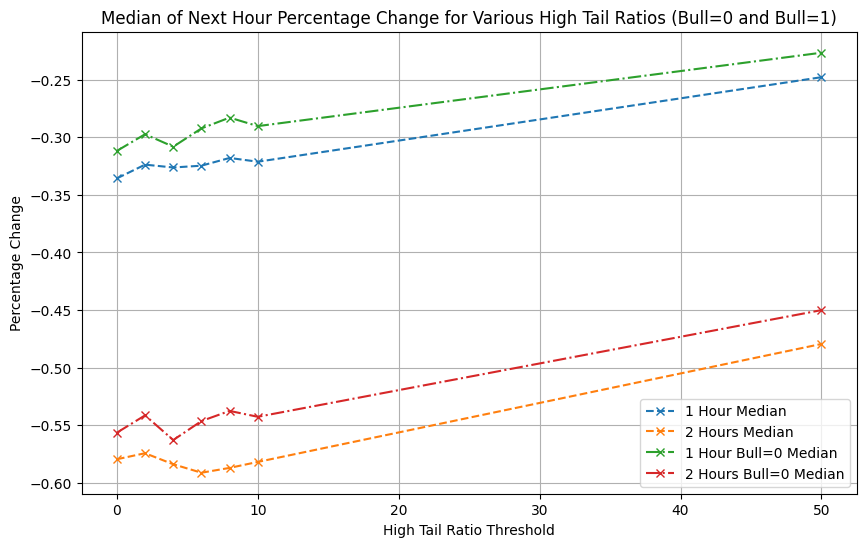

In [205]:
import matplotlib.pyplot as plt

# Assuming stats_df is your DataFrame with the statistics

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot for median values for next 1h and 2h
plt.plot(stats_df['high_tail_ratio_threshold'], stats_df['next_1h_min_chg_median'], label='1 Hour Median', linestyle='--', marker='x')
plt.plot(stats_df['high_tail_ratio_threshold'], stats_df['next_2h_min_chg_median'], label='2 Hours Median', linestyle='--', marker='x')

# Plot for median values for bull == 0 (next 1h and 2h)
plt.plot(stats_df['high_tail_ratio_threshold'], stats_df['next_1h_min_chg_bull_0_median'], label='1 Hour Bull=0 Median', linestyle='-.', marker='x')
plt.plot(stats_df['high_tail_ratio_threshold'], stats_df['next_2h_min_chg_bull_0_median'], label='2 Hours Bull=0 Median', linestyle='-.', marker='x')

# Adding labels and title
plt.xlabel('High Tail Ratio Threshold')
plt.ylabel('Percentage Change')
plt.title('Median of Next Hour Percentage Change for Various High Tail Ratios (Bull=0 and Bull=1)')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()